In [187]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import utils

### Adagrad 

In [188]:
# using linspace(start, stop, num) to generate the values in X equally distributed between 0 and 20
# num is 50 (default)
X = np.linspace(0, 20)
y = -1*X + 2

In [189]:
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [190]:
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

In [191]:
def AdaGrad(x,y,alpha):
    #1. Initialize parameters (theta_0 & theta_1) with zero.
    theta_0 = 0
    theta_1 = 0
    
    thetas_0 = []
    thetas_1 = []
    js = []
    
    vt_0 = 0
    vt_1 = 0
    epsilon = 10**-8
    #x,y = utils.shuffle(x,y)
    
    #8. Repeat from 2 to 6 until converge to the minimum or achieve maximum iterations.
    for i in range(1000):
        
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
        hx = theta_0 + (theta_1 * x)

        #3. Calculate Cost function 𝑱(theta_0,theta_1 )
        j = (np.sum(hx - y)**2)/(2*len(x))

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        js.append(j)

        #4. Calculate the gradient
        g_theta_0 = np.sum(hx-y)/len(x)
        g_theta_1 = np.sum((hx-y) * x)/len(x)
        
        #5. calculate the accumulated gradient square
        vt_0 = vt_0 + g_theta_0**2
        vt_1 = vt_1 + g_theta_1**2
        
        #6. Update the parameters (simultaneously)
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0) + epsilon) * g_theta_0)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1) + epsilon) * g_theta_1)
        
        #7. Stop condition
        #thetas_vactor_prev = np.array([thetas_0[-1], thetas_1[-1]])
        #thetas_vector_curr = np.array([theta_0, theta_1])
        if i>1 and abs(js[i-2] - js[i-1]) < 0.0001: #and (np.linalg.norm(thetas_vactor_prev) - np.linalg.norm(thetas_vector_curr)) < 0.0001:
            break;
        
    return i, thetas_0, thetas_1, js

In [259]:
i, thetas_0, thetas_1, js = AdaGrad(X,y,0.9)

In [260]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 174 times
and the min cost is 0.001790323293810271


In [261]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 174 iterations')

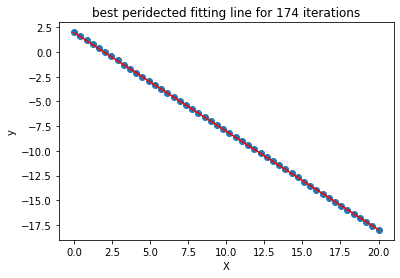

In [262]:
plt.scatter(X,y)
plt.plot(X, yhat, color ='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Epochs vs Cost function')

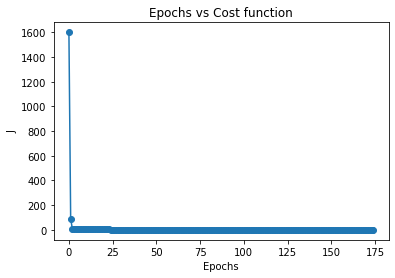

In [263]:
plt.plot(np.arange(i+1), js,'-o')
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

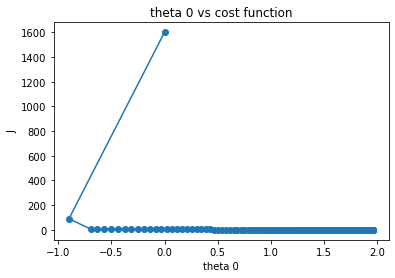

In [264]:
# theta 0
plt.plot(thetas_0,js,'-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

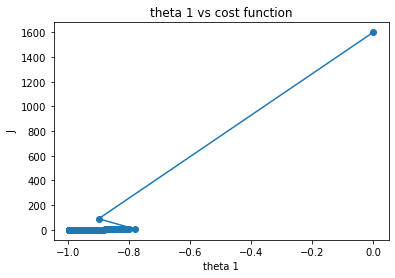

In [265]:
# theta 1
plt.plot(thetas_1,js,'-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [266]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 99%
